In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving reduced_mnist.csv to reduced_mnist (1).csv
Saving test_wbcd.csv to test_wbcd (1).csv
Saving train_wbcd.csv to train_wbcd (1).csv
User uploaded file "reduced_mnist.csv" with length 4610614 bytes
User uploaded file "test_wbcd.csv" with length 4499 bytes
User uploaded file "train_wbcd.csv" with length 21924 bytes


*Created by **Akib Mashrur** *


In the first cell all relevant modules have been imported.

In [0]:
### Importing relevant modules ###

## Data Preprocessing
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
import warnings

## Sklearn Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

## Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

## Visualisation
import matplotlib.pyplot as plt

**Part A**

*1.1 Data Munging*

• Read the training and testing data. Print the number of features in the dataset.

• For the data label, print the total number of 1's and 0's in the training and testing data. Comment on the class
distribution. Is it balanced or unbalanced?

• Print the number of features with missing entries.

• Fill the missing entries. For filling any feature, you can use either mean or median value of the feature values
from observed entries.

• Normalize the training and testing data.

The number of features in the dataset are: 30
0    72
1    48
Name: TARGET, dtype: int64
Selected dataframe has 33 columns.
There are 1 columns that have missing values.
     Missing Values  % of Total Values
f21               3                2.5


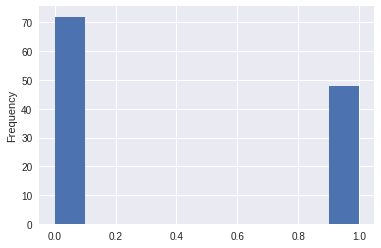

In [0]:
warnings.filterwarnings("ignore")

##### Criteria 1 #####
## Read the training and testing data. Print the number of features in the dataset

train = pd.read_csv("train_wbcd.csv")
test = pd.read_csv("test_wbcd.csv")

dataset = pd.concat([train,test])

# We can see from the dataset all the feature columns starts with "f"
features = dataset.filter(regex='[f]', axis=1)
number_of_examples, number_of_features = features.shape
print(f"The number of features in the dataset are: {number_of_features}")

features.head()

## For the data label, print the total number of 1's and 0's in the training and testing data. 

# Label Encoding Datset for analyzing distribution and creating Regression Model
le = preprocessing.LabelEncoder()
le.fit(dataset['Diagnosis'])
dataset['TARGET'] = le.transform(dataset['Diagnosis'])

print(dataset['TARGET'].value_counts())

## Comment on the class distribution. Is it balanced or unbalanced?
dataset['TARGET'].astype(int).plot.hist()

## Print the number of features with missing entries

# Function to calculate missing values by column 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values = missing_values_table(dataset)
print(missing_values)


# Replacing missing values with mean
dataset['f21'].fillna(dataset['f21'].mean(), inplace = True)

## Normalizing the training and testing data

# Only keeping the features and target attribute for the dataset 
dataset_filtered = dataset.iloc[:,2:]

# Normalizing both train and test data based on z-transformation
dataset_scaled = preprocessing.scale(dataset_filtered)

** Explanation: **

The total number of features in the dataset are 30. We can see based on the merged dataset the the label is moderately imbalanced. There are 72 benign cases (0) and 48 malignant cases (1). 

Also, there is once column with missing values. The missing values have been replaced using the mean of overall column.


*1.2 Logistic Regression* 

Train logistic regression models with L1 regularization and L2 regularization using alpha = 0.1
and lambda = 0.1. Report accuracy, precision, recall, f1-score and print the confusion matrix.

In [0]:
##### Criteria 2 #####

# Seperating the data into predictors/ Response and splitting them into train/test as per original order

# Predictors
X_train = dataset.iloc[0:100,2:32]
X_test = dataset.iloc[100:121,2:32]

# Labels
y_train = dataset.iloc[0:100,32:]
y_test = dataset.iloc[100:121,32:]


## Train logistic regression with L1 regularization using alpha = .1

alpha_val = 0.1
lr1 = LogisticRegression(C= 1/alpha_val, penalty='l1')
lr1_model = lr1.fit(X_train,y_train)

## Train logistic regression with L2 regularization using lambda = .1

lambda_val = 0.1
lr2 = LogisticRegression(C= 1/lambda_val, penalty='l2',)
lr2_model = lr2.fit(X_train,y_train)

## Train logistic regression using Elastic Net (Both L1 and L2 together)

lr3 = SGDClassifier(loss='log', penalty='elasticnet', alpha = alpha_val, l1_ratio=0.5, max_iter=1000,random_state=2018)
lr3_model = lr3.fit(X_train,y_train)

## Evaluating both the models

y_predict_l1 = lr1_model.predict(X_test)
y_predict_l2 = lr2_model.predict(X_test)
y_predict_l3 = lr3_model.predict(X_test)

# Accuracy Scores
# print("Accuracy Scores:")
model_acc_l1 = accuracy_score(y_predict_l1, y_test)*100
model_acc_l2 = accuracy_score(y_predict_l2, y_test)*100
model_acc_l3 = accuracy_score(y_predict_l3, y_test)*100

accuracies = pd.Series(list((model_acc_l1,model_acc_l2,model_acc_l3)))

# Precision Scores
# print("Precision Scores:")
model_prec_l1 = precision_score(y_predict_l1, y_test)*100
model_prec_l2 = precision_score(y_predict_l2, y_test)*100
model_prec_l3 = precision_score(y_predict_l3, y_test)*100

precisions = pd.Series(list((model_prec_l1,model_prec_l2,model_prec_l3)))

# Recall Scores

model_rec_l1 = recall_score(y_predict_l1, y_test)
model_rec_l2 = recall_score(y_predict_l2, y_test)
model_rec_l3 = recall_score(y_predict_l3, y_test)

recalls = pd.Series(list((model_rec_l1,model_rec_l2,model_rec_l3)))

# f1 Scores

model_f1_l1 = f1_score(y_predict_l1, y_test)
model_f1_l2 = f1_score(y_predict_l2, y_test)
model_f1_l3 = f1_score(y_predict_l3, y_test)

f1 = pd.Series(list((model_f1_l1,model_f1_l2,model_f1_l3)))


# Confusion Metrices

model_cm_l1 = confusion_matrix(y_predict_l1, y_test)
print(f"Confusion matrix for L1 model is: \n{model_cm_l1}")
model_cm_l2 = confusion_matrix(y_predict_l2, y_test)
print(f"Confusion matrix for L2 model is: \n{model_cm_l2}")
model_cm_l3 = confusion_matrix(y_predict_l3, y_test)
print(f"Confusion matrix for Elastic Net is: \n{model_cm_l3}")

performance_matrix = pd.DataFrame()

performance_matrix['model'] = pd.Series(list(('L1', 'L2', 'Elastic Net')))
performance_matrix['accuracy'] = accuracies
performance_matrix['precision'] = precisions
performance_matrix['recall'] = recalls
performance_matrix['f1'] = f1

performance_matrix


Confusion matrix for L1 model is: 
[[12  1]
 [ 2  5]]
Confusion matrix for L2 model is: 
[[12  1]
 [ 2  5]]
Confusion matrix for Elastic Net is: 
[[14  2]
 [ 0  4]]


,model,accuracy,precision,recall,f1
0,L1,85.0,83.333333,0.714286,0.769231
1,L2,85.0,83.333333,0.714286,0.769231
2,Elastic Net,90.0,66.666667,1.000000,0.800000


**Explanation**

We can see from the performance matrix above that Elastic Net performs best when it comes to accuracy, however it is not as precise as the L1 and L2 model.

**1.3 Choosing the best hyper-parameter:**


To choose the best hyperparameter (alpha/lambda) value, you have to do the following was done:

• For each value of hyperparameter, performed 100 random splits of training data into training and validation
data.

• Found the average validation accuracy for each 100 train/validate pairs.

The best hyperparameter was chosen with the maximum validation accuracy. Using the best alpha and lambda parameter, a new models were re-trained. 

Also evaluated the prediction performance on the test data and report the following:

• Precision

• Accuracy

• The top 5 features selected in decreasing order of feature weights.

• Confusion matrix

Finally, it was explained whether we have build underfit or overfit models.

In [0]:
# Building a function to calculate model accuracy in every iteration

def runLRmodel(trials, train_data, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,31])

   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(data, test_size=0.3)
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type)
      lr.fit(Dtrain.iloc[:,0:30], Dtrain.iloc[:,30:])
      y_predict = lr.predict(X_test)
      model_acc += accuracy_score(y_predict, y_test)
      model_weights += np.append(lr.intercept_, lr.coef_)

   model_acc /= trials
   model_weights /= trials

   return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

# Identifying the best Alpha value

data = pd.concat([X_train,y_train], axis = 1)
alpha_vals = [.1,1,3,10,33,100,333,1000,3333,10000,33333]
l1_acc = np.zeros(len(alpha_vals))
index = 0
# L1 regularization
for l in alpha_vals:
   l1_acc[index], w = runLRmodel(100,data, 'l1', np.float(l))
   index += 1

print("Acc: {}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))

# Building a new linear regression model based on best alpha

lr_alpha = LogisticRegression(C= 1/best_alpha, penalty='l1')
lr_alpha_model = lr_alpha.fit(X_train,y_train)

# Predicting on test dataset

y_predict_alpha = lr_alpha_model.predict(X_test)

# Accuracy Scores

model_acc_best_l1 = accuracy_score(y_predict_alpha, y_test)*100
print(f"Accuracy for model with best alpha is {model_acc_best_l1}%")

# Precision Scores

model_prec_best_l1 = precision_score(y_predict_alpha, y_test)*100
print(f"Precision for model with best alpha is {model_prec_best_l1}%")

# Confusion Metrices

model_cm_best_l1 = confusion_matrix(y_predict_alpha, y_test)
print(f"Confusion Matrix for model with best alpha is: \n {model_cm_best_l1}")

# Top 5 features (Sorted)

feature_weights=lr_alpha_model.coef_[0]
Weight_matrix = pd.DataFrame()
Weight_matrix['Feature'] = pd.Series(list(features.columns.values))
Weight_matrix['Weights'] = pd.Series(feature_weights,name= "Weights")
Weight_matrix['Abs Weights'] = abs(Weight_matrix['Weights'])

Weight_matrix.sort_values('Abs Weights',ascending = False).head(5)

Acc: [0.83 0.84 0.82 0.89 0.92 0.92 0.93 0.31 0.3  0.48 0.7 ]
Best Alpha: 333
Accuracy for model with best alpha is 95.0%
Precision for model with best alpha is 83.33333333333334%
Confusion Matrix for model with best alpha is: 
 [[14  1]
 [ 0  5]]


,Feature,Weights,Abs Weights
2,f3,-0.037094,0.037094
23,f24,0.008297,0.008297
3,f4,-0.005506,0.005506
0,f1,0.000000,0.000000
16,f17,0.000000,0.000000


In [0]:
# instantiating needed lists

lambda_vals = [.001,.003,.01,.03,.1,.3,1,3,10,33]
l2_acc = np.zeros(len(lambda_vals))
index = 0
# L2 regularization
for l in lambda_vals:
   l2_acc[index], w = runLRmodel(100,data, 'l2', np.float(l))
   index += 1

print("Acc: {}".format(l2_acc))
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda: {}".format(best_lambda))

# Building a new linear regression model based on best lambda

lr_lambda = LogisticRegression(C= 1/best_lambda, penalty='l2')
lr_lambda_model = lr_lambda.fit(X_train,y_train)

# Predicting on test dataset

y_predict_lambda = lr_lambda_model.predict(X_test)

# Accuracy Scores

model_acc_best_l2 = accuracy_score(y_predict_lambda, y_test)*100
print(f"Accuracy for model with best lambda is {model_acc_best_l2}%")

#Precision Scores

model_prec_best_l2 = precision_score(y_predict_lambda, y_test)*100
print(f"Precision for model with best lambda is {model_prec_best_l2}%")

#Confusion Metrices

model_cm_best_l2 = confusion_matrix(y_predict_lambda, y_test)
print(f"Confusion Matrix for model with best lambda is: \n {model_cm_best_l2}")

#Top 5 features (Sorted)

feature_weights_lambda=lr_lambda_model.coef_[0]
Weight_matrix_lambda = pd.DataFrame()
Weight_matrix_lambda['Feature'] = pd.Series(list(features.columns.values))
Weight_matrix_lambda['Weights'] = pd.Series(feature_weights_lambda,name= "Weights")
Weight_matrix_lambda['Abs Weights'] = abs(Weight_matrix_lambda['Weights'])

Weight_matrix_lambda.sort_values('Abs Weights',ascending = False).head(5)

Acc: [0.83 0.83 0.83 0.83 0.83 0.84 0.83 0.84 0.82 0.83]
Best Lambda: 0.3
Accuracy for model with best lambda is 85.0%
Precision for model with best lambda is 83.33333333333334%
Confusion Matrix for model with best lambda is: 
 [[12  1]
 [ 2  5]]


,Feature,Weights,Abs Weights
0,f1,-2.079512,2.079512
20,f21,-1.477307,1.477307
26,f27,1.078841,1.078841
25,f26,0.851103,0.851103
2,f3,-0.815760,0.815760


**Explanation:**

Based on the above two model accuracies with best alpha/ lambda values, we can see that L1 regularized model with alpha 333 gives us the best accuracy of 95% which is higher than the average validation accuracy score of 85%. Also, there is no sign of underfitting/ overfitting since the accuracy was tested on an unseen test data and still maintains a moderately high accuracy.

However, it should be noted that since it is apparently a cancer classification dataset, precision might be a more important performance indicator than accuracy, but alarmingly, we have a relatively low precision (83.33%). We need to evaluate building better models in this case.

In [0]:
## Part A ends here ##